# Aufgabe 28


a) Fitten sie mit der Methode der kleinsten Quadrate ein Polynom sechsten Grades an die Daten derDateiaufg_a.csv. Geben Sie die resultierenden Koeffizienten an und zeichnen Sie das gefittetePolynom und die Daten in eine Abbildung ein.

Polynom: $ax⁶+bx⁵+cx⁴+dx³+ex²+fx+g$

Bestimmen der Koeffizienten mit: $\vec{a} = (A^TA)^{-1}A.T\vec{y}$

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [111]:
data = pd.read_csv('aufg_a.csv')
x = data["x"].values[:]
y = data[' "y_0"'].values[:]

In [112]:
# Aufstellen der Desingmatrx A

A = np.zeros((len(x),7))

for index,value in enumerate(x):
    for i in range(0,7):
        A[index,i]=value**i

# Berechnen der Koeffizienten

a = np.linalg.inv(A.T @ A) @ A.T @ y
print(a)

[-6.74453241e-02  6.09609032e-01 -5.13748208e-01  2.10566519e-01
 -4.52007747e-02  4.78568044e-03 -1.96288194e-04]


In [113]:
# Plotten

def polynom(x,para):
    f=0
    for i,value in enumerate(para):
        f=f+value*x**i
    return f

x1 = np.linspace(0, x.max(), 1000)
plt.plot(x1, polynom(x1, a), "-", label="Fit")
plt.plot(x, y, "x", label="Messwerte")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

b)Fitten sie mit der Methode der kleinsten Quadrate ein Polynom sechsten Grades an die Daten derDateiaufg_a.csvund nutzen Sie dabei zusätzlich die Regularisierung über die zweite Ableitung(𝛤 =√𝜆𝐶𝐴). Für die Regularisierungsstärke nutzen sie𝜆 ∈ (0.1,0.3,0.7,3,10). Geben Sie dieresultierenden Koeffizienten an und zeichnen Sie das gefittete Polynome und die Daten in eineAbbildung.

In [114]:
lam = [0, 0.1, 0.3, 0.7, 3, 10]
C = -2 *np.eye(len(x)) + np.eye(len(x), k =1) + np.eye(len(x), k =-1)
C[0,0] = C[-1,-1] = -1

a = np.zeros((len(lam),7))

def reg(lam, A, y):
    a = np.linalg.inv(A.T @ A + lam * (C @ A).T @ (C @ A)) @ A.T @ y
    return a

for index,lamb in enumerate(lam):
    a[index,:] = reg(lamb, A, y)
    
print(a)

[[-6.74453241e-02  6.09609032e-01 -5.13748208e-01  2.10566519e-01
  -4.52007747e-02  4.78568044e-03 -1.96288194e-04]
 [ 5.27965883e-02  2.59531149e-01 -1.93231286e-01  7.69667250e-02
  -1.71628070e-02  1.90376484e-03 -8.10349701e-05]
 [ 1.11464648e-01  1.07755243e-01 -6.42970519e-02  2.49315777e-02
  -6.33557738e-03  7.89265587e-04 -3.62702784e-05]
 [ 1.42378398e-01  4.36794607e-02 -1.71856911e-02  6.46195658e-03
  -2.35843750e-03  3.58573783e-04 -1.81387872e-05]
 [ 1.69656309e-01  7.96727955e-03 -1.06348501e-03 -1.07152879e-04
  -4.91755883e-04  1.07573168e-04 -6.00485672e-06]
 [ 1.73753418e-01  2.10097391e-03 -2.09778443e-03 -1.88380412e-04
  -1.43934178e-04  3.94085783e-05 -2.28679067e-06]]


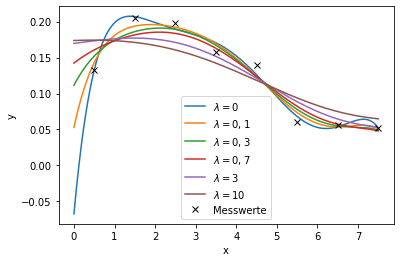

In [115]:
x1 = np.linspace(0, x.max(), 1000)
plt.plot(x1, polynom(x1, a[0]), "-", label=r"$\lambda = 0$")
plt.plot(x1, polynom(x1, a[1]), "-", label=r"$\lambda = 0,1$")
plt.plot(x1, polynom(x1, a[2]), "-", label=r"$\lambda = 0,3$")
plt.plot(x1, polynom(x1, a[3]), "-", label=r"$\lambda = 0,7$")
plt.plot(x1, polynom(x1, a[4]), "-", label=r"$\lambda = 3$")
plt.plot(x1, polynom(x1, a[5]), "-", label=r"$\lambda = 10$")
plt.plot(x, y, "x", color="black", label="Messwerte",)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

c)Fitten Sie mit der Methode der kleinsten Quadrate ein Polynom sechsten Grades an die Mit-telwerte der Daten aus der Dateiaufg_c.csv. Gewichten Sie die berechneten Mittelwerte mitdem Fehler des Mittelwerts. Nutzen Sie diese Gewichte beim Fitten. Zeichnen Sie das gefittetePolynom und die gemittelten Daten in eine Abbildung ein.

In [125]:
data = pd.read_csv('aufg_c.csv')

y = data.iloc[:,1:].mean(axis=1)
y_err =  data.iloc[:,1:].std(axis=1) / np.sqrt(50)

W = np.diag(1/(y_err**2))

a = np.linalg.inv(A.T @ W @ A) @ A.T @ W @ y
print(a)

[ 1.03975571e-01  1.92955261e-02  6.17000835e-02 -3.75650730e-02
  7.91884410e-03 -7.34894268e-04  2.56958565e-05]


In [140]:
x1 = np.linspace(0, x.max(), 1000)
plt.plot(x1, polynom(x1, a), "-", label="Fit")
plt.errorbar(x, y, yerr=y_err, label="Messwerte", fmt="x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')